In [89]:
import csv
import os

import biosppy.signals.ecg as ecg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import LSTM
import pyhrv
from opensignalsreader import OpenSignalsReader
import matplotlib
from tsfel import feature_extraction

In [84]:
train_x = pd.read_csv("X_train.csv")
train_y = pd.read_csv("y_train.csv")
test_x = pd.read_csv("X_test.csv")
train_signal = train_x.drop('id',axis = 1)
test_signal = test_x.drop('id',axis = 1)

## Adding time series features

spectral_centroid(signal, fs)	Barycenter of the spectrum.
spectral_decrease(signal, fs)	Represents the amount of decreasing of the spectra amplitude.
spectral_distance(signal, fs)	Computes the signal spectral distance.
spectral_entropy(signal, fs)	Computes the spectral entropy of the signal based on Fourier transform.
spectral_kurtosis(signal, fs)	Measures the flatness of a distribution around its mean value.
spectral_positive_turning(signal, fs)	Computes number of positive turning points of the fft magnitude signal.
spectral_roll_off(signal, fs)	Computes the spectral roll-off of the signal.
spectral_roll_on(signal, fs)	Computes the spectral roll-on of the signal.
spectral_skewness(signal, fs)	Measures the asymmetry of a distribution around its mean value.
spectral_slope(signal, fs)	Computes the spectral slope.
spectral_spread(signal, fs)	Measures the spread of the spectrum around its mean value.
spectral_variation(signal, fs)	Computes the amount of variation of the spectrum alon

In [436]:
all_features_spectral_train = []
for i in range(train_signal.shape[0]):
    cur_signal = np.array(train_signal.iloc[i].dropna())
    spectral_spread = feature_extraction.features.spectral_spread(cur_signal,fs=300)
    spectral_centroid = feature_extraction.features.spectral_centroid(cur_signal,fs=300)
    spectral_decrease = feature_extraction.features.spectral_decrease(cur_signal,fs=300)
    spectral_distance = feature_extraction.features.spectral_distance(cur_signal,fs=300)
    spectral_entropy = feature_extraction.features.spectral_entropy(cur_signal,fs=300)
    spectral_kurtosis = feature_extraction.features.spectral_kurtosis(cur_signal,fs=300)
    spectral_positive_turning = feature_extraction.features.spectral_positive_turning(cur_signal,fs=300)
    spectral_roll_off = feature_extraction.features.spectral_roll_off(cur_signal,fs=300)
    spectral_roll_on = feature_extraction.features.spectral_roll_on(cur_signal,fs=300)
    spectral_skewness = feature_extraction.features.spectral_skewness(cur_signal,fs=300)
    spectral_slope = feature_extraction.features.spectral_slope(cur_signal,fs=300)
    spectral_variation = feature_extraction.features.spectral_variation(cur_signal,fs=300)

    cur_features = [spectral_spread, spectral_centroid, spectral_decrease,spectral_distance,spectral_entropy,spectral_kurtosis,
    spectral_positive_turning,spectral_roll_off,spectral_roll_on,spectral_skewness,spectral_slope,spectral_variation]
    all_features_spectral_train.append(cur_features)

In [437]:
spectral_col_names = ['spectral_spread', 'spectral_centroid', 'spectral_decrease','spectral_distance','spectral_entropy','spectral_kurtosis',
    'spectral_positive_turning','spectral_roll_off','spectral_roll_on','spectral_skewness','spectral_slope','spectral_variation']
spectral_feature_df = pd.DataFrame(all_features_spectral_train,columns=spectral_col_names)
spectral_feature_df

,spectral_spread,spectral_centroid,spectral_decrease,spectral_distance,spectral_entropy,spectral_kurtosis,spectral_positive_turning,spectral_roll_off,spectral_roll_on,spectral_skewness,spectral_slope,spectral_variation
0,16.953536,15.125016,-0.032311,-1.230519e+11,0.643504,19.246820,2712,40.015974,0.921602,3.286332,-0.000004,0.180860
1,22.087049,14.142690,0.003336,-2.536110e+10,0.574455,16.416652,1400,53.250346,0.449516,3.394624,-0.000007,0.185237
2,13.706668,13.962736,-0.031759,-4.077508e+10,0.631077,21.086734,1338,34.501481,0.518263,2.930253,-0.000008,0.167720
3,14.104663,14.578331,-0.053231,-4.932280e+10,0.718109,29.388779,1388,32.525228,0.886045,3.999761,-0.000008,0.231483
4,16.245034,14.246052,-0.059849,-3.512121e+10,0.646719,22.249614,1371,36.683417,0.430725,3.418418,-0.000008,0.151049
...,...,...,...,...,...,...,...,...,...,...,...,...
5112,14.511620,11.484060,0.001111,-2.174082e+10,0.577513,25.229964,855,33.352601,0.346821,3.719172,-0.000013,0.150415
5113,17.355783,16.852292,-0.033290,-1.596287e+10,0.555675,19.058929,1393,41.801548,0.809289,3.266028,-0.000007,0.396364
5114,15.520855,14.079292,0.013829,-4.062462e+10,0.680626,23.073308,1345,36.053412,0.593472,3.496015,-0.000008,0.163726
5115,16.883831,14.233271,-0.049823,-1.590819e+10,0.629096,23.030738,1406,37.233286,0.604552,3.742617,-0.000008,0.227014


In [438]:
class_zero = spectral_feature_df[train_y['y'] == 0]
class_one = spectral_feature_df[train_y['y'] == 1]
class_two = spectral_feature_df[train_y['y'] == 2]
class_three = spectral_feature_df[train_y['y'] == 3]

In [447]:
print('mean:')
for i in range(0,12):
    print(class_zero.iloc[:,i].mean())
print('median:')
for i in range(0,12):
    print(class_zero.iloc[:,i].median())
print('variance:')
for i in range(0,12):
    print(class_zero.iloc[:,i].var())  

mean:
16.95202760490174
14.112389658668361
-0.032185848604074925
-52727311689.57217
0.6186255670300376
23.567234832790582
1476.2359735973598
39.76616712358686
0.7935060435049306
3.7240363986046017
-7.959601124461212e-06
0.20165512674122626
median:
16.200183670926563
14.20100965914143
-0.02911326444276005
-36200362659.98346
0.6280416200500398
23.40332048262134
1381.0
36.55047994447115
0.7068452380952381
3.709802430893573
-7.746658400905573e-06
0.20170530253477875
variance:
10.687203679054246
6.2663998652147965
0.001104358377629186
3.2391612260008754e+21
0.0041453790370554605
34.58983874719526
223300.11696232352
135.70026652789974
0.14556847275863782
0.22044279070719333
7.842331975632174e-12
0.004029184236951536


In [448]:
print('mean:')
for i in range(0,12):
    print(class_one.iloc[:,i].mean())
print('median:')
for i in range(0,12):
    print(class_one.iloc[:,i].median())
print('variance:')
for i in range(0,12):
    print(class_one.iloc[:,i].var())  

mean:
16.376103629757115
13.91012945562495
-0.04493533363398134
-60272564852.89474
0.6604263724102692
24.703460901432923
1475.5846501128667
38.57839325112794
0.9005557026209607
3.7995584436992864
-8.673660716409146e-06
0.2119513399916523
median:
15.620216184303226
14.019769200429824
-0.040933355887208894
-36165830764.23501
0.6781601896935779
23.88630008352485
1384.0
36.13861386138614
0.8581235697940504
3.7418366117674515
-7.782498134509344e-06
0.21855763819541119
variance:
10.134476162464347
5.547185563333329
0.0014845296584499136
7.41055906444341e+21
0.0040456035077216885
38.66888873060717
351604.035238961
119.36642806685184
0.15157644109516427
0.26732964842447016
1.8246763300130915e-11
0.002638252479828289


In [449]:
print('mean:')
for i in range(0,12):
    print(class_two.iloc[:,i].mean())
print('median:')
for i in range(0,12):
    print(class_two.iloc[:,i].median())
print('variance:')
for i in range(0,12):
    print(class_two.iloc[:,i].var())  

mean:
16.56157784947789
13.742943773273007
-0.04647899743081454
-65651989960.77334
0.6232872027085947
24.698517195439077
1578.1818181818182
38.83627934435478
0.8267387229531218
3.8161702639135675
-7.587909084294572e-06
0.21191878052969873
median:
15.854592139777575
13.800694107467331
-0.039292201098552894
-37887100451.51327
0.6375791780347149
23.934405797524416
1388.5
36.319410285839204
0.7590361886506714
3.771554927895873
-7.71702684506416e-06
0.209254070845737
variance:
10.353235148901915
6.504233780354242
0.0026438105982020503
5.60590269672639e+21
0.005580510972614088
45.4969314933565
300775.7904091835
125.21778017476797
0.13876799601947046
0.2936031291915122
7.328324692680997e-12
0.004391035564430775


In [450]:
print('mean:')
for i in range(0,12):
    print(class_three.iloc[:,i].mean())
print('median:')
for i in range(0,12):
    print(class_three.iloc[:,i].median())
print('variance:')
for i in range(0,12):
    print(class_three.iloc[:,i].var())  

mean:
18.35052244391145
12.2890062374393
-0.011282186192234775
-58159395357.67046
0.5558853121723142
24.12802870592699
1088.770588235294
43.89306569248601
0.5337566142374246
3.8620868847026535
-1.2370773983566233e-05
0.17361943740699862
median:
17.19128157166908
11.410051088071086
-0.004472345064442935
-25517552455.909866
0.5448839380554651
22.765494294601357
1190.5
38.12846218425406
0.4737616320604794
3.8891226819513527
-9.110157453938992e-06
0.18361298342240678
variance:
27.08697906310983
22.11338017596335
0.001319182663677227
9.770574581415738e+21
0.007593670949212807
101.41631732806368
251483.89380438565
429.21995625368936
0.05303995790598258
0.7971138333154966
3.496864106762322e-11
0.0041767299831126726


## Adding hrv features

hr_mean (float): Mean heart rate [bpm]
hr_min (int): Minimum heart rate [bpm]
hr_max (int): Maximum heart rate [bpm]
hr_std (float): Standard deviation of the heart rate series [bpm]

sdnn_index (float): SDNN Index [ms]
sdann (float): SDANN [ms]

nn50 (int): Number of NN interval differences greater 50ms
pnn50 (float): Ratio between NN50 and total number of NN intervals [ms]
nn20 (int): Number of NN interval differences greater 20ms
pnn20 (float): Ratio between NN20 and total number of NN intervals [ms]

tinn_n (float): N value of the TINN computation (left corner of the interpolated triangle at (N, 0))
tinn_m (float): M value of the TINN computation (right corner of the interpolated triangle at (M, 0))
tinn (float): TINN (baseline width of the interpolated triangle) [ms]

fft_ratio (float): LF/HF ratio [-]
fft_total (float): Total power over all frequency bands [ms^2]
fft_norm (25.656041261819233, 74.34395873818077)

In [28]:
count = 0
all_features_hrv_train = []
for i in range(train_signal.shape[0]):
    cur_signal = np.array(train_signal.iloc[i].dropna())
    ts, filtered, rpeaks, templates_ts, templates, heart_rate_ts, heart_rate = ecg.ecg(cur_signal, sampling_rate=300, show=False)
    if(heart_rate.size == 0):
        count += 1
        min_hr = np.nan
        max_hr = np.nan
        std_hr = 0
        mean_hr = np.nan
        median_hr= np.nan
    else:
        min_hr = heart_rate.min()
        max_hr = heart_rate.max()
        std_hr = heart_rate.std()
        mean_hr = heart_rate.mean()
        median_hr = np.median(heart_rate)

    cur_features = [min_hr,max_hr,std_hr,mean_hr,median_hr]
    all_features_hrv_train.append(cur_features)

In [29]:
count

3

In [30]:
count = 0
all_features_hrv_test = []
for i in range(test_signal.shape[0]):
    cur_signal = np.array(test_signal.iloc[i].dropna())
    ts, filtered, rpeaks, templates_ts, templates, heart_rate_ts, heart_rate = ecg.ecg(cur_signal, sampling_rate=300, show=False)
    if(heart_rate.size == 0):
        count += 1
        min_hr = np.nan
        max_hr = np.nan
        std_hr = 0
        mean_hr = np.nan
        median_hr= np.nan
    else:
        min_hr = heart_rate.min()
        max_hr = heart_rate.max()
        std_hr = heart_rate.std()
        mean_hr = heart_rate.mean()
        median_hr = np.median(heart_rate)

    cur_features = [min_hr,max_hr,std_hr,mean_hr,median_hr]
    all_features_hrv_test.append(cur_features)

In [31]:
count

2

In [51]:
col_names = ['min_hr','max_hr','std_hr','mean_hr','median_hr']
hrv_feature_df = pd.DataFrame(all_features_hrv_train,columns=col_names)
hrv_feature_df

,min_hr,max_hr,std_hr,mean_hr,median_hr
0,70.680871,146.448980,10.232507,74.614771,72.192771
1,69.678350,85.586597,3.975789,76.344440,75.393426
2,62.172890,70.603353,2.222078,66.716786,66.598143
3,118.349540,170.026161,11.681454,150.677985,152.690974
4,83.424856,108.436358,5.943025,99.399605,100.384891
...,...,...,...,...,...
5112,68.965517,139.401010,21.610936,87.673461,77.400843
5113,66.537127,70.868347,0.773221,69.511665,69.500832
5114,61.595023,89.404463,8.764188,76.964032,75.527404
5115,68.183767,74.324551,1.396115,70.808787,70.716359


In [49]:
hrv_feature_df_test = pd.DataFrame(all_features_hrv_test,columns=col_names)
hrv_feature_df_test

,min_hr,max_hr,std_hr,mean_hr,median_hr
0,62.510604,74.796861,4.366141,70.277400,72.122188
1,51.894703,60.555006,2.220559,56.139195,56.312074
2,52.500825,116.251198,18.071460,74.766662,68.944280
3,60.675231,63.684188,0.855625,62.224823,62.148522
4,57.598099,64.240052,1.899901,60.723841,60.525255
...,...,...,...,...,...
3406,56.505058,150.839768,23.646815,95.751592,85.226926
3407,56.493202,115.947911,16.417606,66.229101,60.338738
3408,71.695350,93.967539,5.184102,79.625615,78.518972
3409,80.718571,83.851337,0.812008,82.087076,81.943850


In [42]:
count

2

In [40]:
train_hrv_feature_filled = hrv_feature_df.fillna(hrv_feature_df.median())
train_hrv_feature_filled.to_csv("X_train_hrv.csv")
test_hrv_feature_filled = hrv_feature_df_test.fillna(hrv_feature_df_test.median())
test_hrv_feature_filled.to_csv("X_test_hrv.csv")

In [47]:
train_hrv_feature_filled

,min_hr,max_hr,std_hr,mean_hr,median_hr
0,70.680871,146.448980,10.232507,74.614771,72.192771
1,69.678350,85.586597,3.975789,76.344440,75.393426
2,62.172890,70.603353,2.222078,66.716786,66.598143
3,118.349540,170.026161,11.681454,150.677985,152.690974
4,83.424856,108.436358,5.943025,99.399605,100.384891
...,...,...,...,...,...
5112,68.965517,139.401010,21.610936,87.673461,77.400843
5113,66.537127,70.868347,0.773221,69.511665,69.500832
5114,61.595023,89.404463,8.764188,76.964032,75.527404
5115,68.183767,74.324551,1.396115,70.808787,70.716359


In [53]:
test_hrv_feature_filled

,min_hr,max_hr,std_hr,mean_hr,median_hr
0,62.510604,74.796861,4.366141,70.277400,72.122188
1,51.894703,60.555006,2.220559,56.139195,56.312074
2,52.500825,116.251198,18.071460,74.766662,68.944280
3,60.675231,63.684188,0.855625,62.224823,62.148522
4,57.598099,64.240052,1.899901,60.723841,60.525255
...,...,...,...,...,...
3406,56.505058,150.839768,23.646815,95.751592,85.226926
3407,56.493202,115.947911,16.417606,66.229101,60.338738
3408,71.695350,93.967539,5.184102,79.625615,78.518972
3409,80.718571,83.851337,0.812008,82.087076,81.943850


## Model Training

In [476]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [477]:
original_features_train = pd.read_csv('X_train_extracted.csv')
original_features_test = pd.read_csv('X_test_extracted.csv')
train_y = pd.read_csv("y_train.csv")

In [478]:
print(original_features_train.shape)
print(original_features_test.shape)

(5117, 34)
(3411, 34)


In [479]:
original_features_train = original_features_train.iloc[:,1:]

In [480]:
original_features_train

,signal_mean,signal_median,signal_sd,signal_max,signal_min,sd_beat_mean,sd_beat_median,sd_beat_sd,sd_beat_max,sd_beat_min,...,r_amplitude_max,r_amplitude_min,pr_interval,p_amplitude,r_amplitude,st_interval,s_amplitude,t_amplitude,qrs_duration,q_amplitude
0,9.252964,-22.0,109.080337,738.0,-236.0,21.177366,18.301699,10.740427,66.877682,10.911437,...,738.0,340.0,46.757576,44.227273,502.257576,61.303030,-82.772727,235.969697,35.439394,-71.530303
1,3.099435,-5.0,122.440336,746.0,-399.0,20.502922,18.827493,6.240304,44.997328,13.176285,...,746.0,17.0,51.428571,25.028571,222.000000,56.555556,-187.885714,132.666667,23.657143,-59.457143
2,16.272974,2.0,200.377573,1588.0,-976.0,13.761332,9.683161,11.609992,78.700793,4.752194,...,1587.0,631.0,42.428571,99.178571,962.892857,72.733333,-350.296296,87.300000,23.777778,-5.851852
3,-25.972687,-39.0,212.318462,864.0,-874.0,62.791023,31.327965,81.638220,402.409376,18.323697,...,864.0,356.0,35.565217,34.782609,585.434783,20.200000,-628.000000,97.200000,22.828125,-122.046875
4,-21.468062,-21.0,156.702879,679.0,-737.0,23.462408,19.200563,15.391773,89.128902,10.574557,...,679.0,-29.0,40.577778,37.933333,267.822222,51.844444,-514.818182,183.177778,18.363636,-139.954545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,-17.040447,-15.0,350.137102,1368.0,-1922.0,136.951350,131.444310,36.052856,250.974658,59.805857,...,1368.0,-963.0,56.363636,330.545455,699.500000,61.391304,-374.826087,278.521739,27.739130,-280.869565
5113,5.511492,5.0,78.615996,515.0,-188.0,11.730159,10.151575,5.217123,33.875287,6.581330,...,515.0,209.0,42.937500,61.156250,439.062500,78.562500,-74.156250,1.906250,31.375000,-39.437500
5114,-0.380841,-28.0,185.522124,976.0,-801.0,21.511856,17.995853,11.884665,81.833907,8.858916,...,976.0,428.0,41.969697,29.545455,749.727273,65.529412,-341.129032,276.294118,19.322581,-123.645161
5115,7.740578,-6.0,70.454310,397.0,-243.0,9.461335,7.737418,4.894605,32.020797,4.882776,...,397.0,201.0,54.093750,4.093750,315.875000,70.625000,-72.233333,109.562500,33.000000,-46.200000


In [481]:
all_features_train = pd.concat([original_features_train,train_hrv_feature_filled], axis=1)
all_features_train

,signal_mean,signal_median,signal_sd,signal_max,signal_min,sd_beat_mean,sd_beat_median,sd_beat_sd,sd_beat_max,sd_beat_min,...,st_interval,s_amplitude,t_amplitude,qrs_duration,q_amplitude,min_hr,max_hr,std_hr,mean_hr,median_hr
0,9.252964,-22.0,109.080337,738.0,-236.0,21.177366,18.301699,10.740427,66.877682,10.911437,...,61.303030,-82.772727,235.969697,35.439394,-71.530303,70.680871,146.448980,10.232507,74.614771,72.192771
1,3.099435,-5.0,122.440336,746.0,-399.0,20.502922,18.827493,6.240304,44.997328,13.176285,...,56.555556,-187.885714,132.666667,23.657143,-59.457143,69.678350,85.586597,3.975789,76.344440,75.393426
2,16.272974,2.0,200.377573,1588.0,-976.0,13.761332,9.683161,11.609992,78.700793,4.752194,...,72.733333,-350.296296,87.300000,23.777778,-5.851852,62.172890,70.603353,2.222078,66.716786,66.598143
3,-25.972687,-39.0,212.318462,864.0,-874.0,62.791023,31.327965,81.638220,402.409376,18.323697,...,20.200000,-628.000000,97.200000,22.828125,-122.046875,118.349540,170.026161,11.681454,150.677985,152.690974
4,-21.468062,-21.0,156.702879,679.0,-737.0,23.462408,19.200563,15.391773,89.128902,10.574557,...,51.844444,-514.818182,183.177778,18.363636,-139.954545,83.424856,108.436358,5.943025,99.399605,100.384891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,-17.040447,-15.0,350.137102,1368.0,-1922.0,136.951350,131.444310,36.052856,250.974658,59.805857,...,61.391304,-374.826087,278.521739,27.739130,-280.869565,68.965517,139.401010,21.610936,87.673461,77.400843
5113,5.511492,5.0,78.615996,515.0,-188.0,11.730159,10.151575,5.217123,33.875287,6.581330,...,78.562500,-74.156250,1.906250,31.375000,-39.437500,66.537127,70.868347,0.773221,69.511665,69.500832
5114,-0.380841,-28.0,185.522124,976.0,-801.0,21.511856,17.995853,11.884665,81.833907,8.858916,...,65.529412,-341.129032,276.294118,19.322581,-123.645161,61.595023,89.404463,8.764188,76.964032,75.527404
5115,7.740578,-6.0,70.454310,397.0,-243.0,9.461335,7.737418,4.894605,32.020797,4.882776,...,70.625000,-72.233333,109.562500,33.000000,-46.200000,68.183767,74.324551,1.396115,70.808787,70.716359


In [482]:
original_features_test = original_features_test.iloc[:,1:]

In [483]:
original_features_test

,signal_mean,signal_median,signal_sd,signal_max,signal_min,sd_beat_mean,sd_beat_median,sd_beat_sd,sd_beat_max,sd_beat_min,...,r_amplitude_max,r_amplitude_min,pr_interval,p_amplitude,r_amplitude,st_interval,s_amplitude,t_amplitude,qrs_duration,q_amplitude
0,32.694585,8.0,295.136865,1713.0,-774.0,47.563263,46.312596,14.793077,116.733412,26.416570,...,1713.0,617.0,61.533333,114.166667,1307.333333,68.800000,-233.931034,217.766667,47.931034,-118.448276
1,25.958193,10.0,153.411453,1093.0,-170.0,11.946757,8.041604,10.296580,50.136547,3.661531,...,1093.0,843.0,64.555556,43.611111,993.055556,82.222222,-128.928571,102.666667,50.785714,-16.142857
2,6.875376,-6.0,248.369246,1356.0,-1133.0,114.933434,108.259214,35.805512,274.501238,66.531054,...,1153.0,-497.0,62.200000,238.628571,432.914286,71.400000,-234.666667,271.114286,37.888889,-327.055556
3,4.515663,-8.0,115.784816,697.0,-484.0,11.632522,9.029634,5.989259,32.803413,4.701707,...,696.0,256.0,51.607143,18.857143,502.071429,60.964286,-66.884615,136.928571,42.000000,-61.269231
4,28.770084,5.0,164.083926,1184.0,-212.0,17.903235,12.997576,12.778532,75.162497,8.176123,...,1184.0,946.0,51.222222,79.851852,1070.888889,72.333333,-114.370370,36.074074,42.222222,-14.925926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,-8.868418,-13.0,148.315337,566.0,-3554.0,69.494875,52.190688,46.812499,271.396360,28.643406,...,566.0,-2.0,53.875000,59.325000,257.050000,56.675000,-193.425000,134.500000,25.375000,-165.350000
3407,0.420236,-22.0,172.227500,1814.0,-824.0,73.163371,64.786917,41.659064,218.825285,20.876081,...,1814.0,460.0,44.961538,122.076923,689.692308,72.642857,-381.962963,287.464286,22.814815,-97.185185
3408,13.040609,-16.0,133.411280,677.0,-590.0,14.060150,10.726266,9.528515,64.734181,6.270423,...,677.0,164.0,43.063492,-0.603175,502.746032,51.128571,-258.319149,180.871429,29.489362,-44.829787
3409,12.833253,-6.0,93.842708,653.0,-161.0,12.866405,10.079883,8.308890,48.392895,7.364755,...,653.0,358.0,33.405405,72.891892,551.270270,70.027027,-66.702703,64.378378,28.432432,-30.000000


In [484]:
all_features_test = pd.concat([original_features_test,test_hrv_feature_filled], axis=1)
all_features_test

,signal_mean,signal_median,signal_sd,signal_max,signal_min,sd_beat_mean,sd_beat_median,sd_beat_sd,sd_beat_max,sd_beat_min,...,st_interval,s_amplitude,t_amplitude,qrs_duration,q_amplitude,min_hr,max_hr,std_hr,mean_hr,median_hr
0,32.694585,8.0,295.136865,1713.0,-774.0,47.563263,46.312596,14.793077,116.733412,26.416570,...,68.800000,-233.931034,217.766667,47.931034,-118.448276,62.510604,74.796861,4.366141,70.277400,72.122188
1,25.958193,10.0,153.411453,1093.0,-170.0,11.946757,8.041604,10.296580,50.136547,3.661531,...,82.222222,-128.928571,102.666667,50.785714,-16.142857,51.894703,60.555006,2.220559,56.139195,56.312074
2,6.875376,-6.0,248.369246,1356.0,-1133.0,114.933434,108.259214,35.805512,274.501238,66.531054,...,71.400000,-234.666667,271.114286,37.888889,-327.055556,52.500825,116.251198,18.071460,74.766662,68.944280
3,4.515663,-8.0,115.784816,697.0,-484.0,11.632522,9.029634,5.989259,32.803413,4.701707,...,60.964286,-66.884615,136.928571,42.000000,-61.269231,60.675231,63.684188,0.855625,62.224823,62.148522
4,28.770084,5.0,164.083926,1184.0,-212.0,17.903235,12.997576,12.778532,75.162497,8.176123,...,72.333333,-114.370370,36.074074,42.222222,-14.925926,57.598099,64.240052,1.899901,60.723841,60.525255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,-8.868418,-13.0,148.315337,566.0,-3554.0,69.494875,52.190688,46.812499,271.396360,28.643406,...,56.675000,-193.425000,134.500000,25.375000,-165.350000,56.505058,150.839768,23.646815,95.751592,85.226926
3407,0.420236,-22.0,172.227500,1814.0,-824.0,73.163371,64.786917,41.659064,218.825285,20.876081,...,72.642857,-381.962963,287.464286,22.814815,-97.185185,56.493202,115.947911,16.417606,66.229101,60.338738
3408,13.040609,-16.0,133.411280,677.0,-590.0,14.060150,10.726266,9.528515,64.734181,6.270423,...,51.128571,-258.319149,180.871429,29.489362,-44.829787,71.695350,93.967539,5.184102,79.625615,78.518972
3409,12.833253,-6.0,93.842708,653.0,-161.0,12.866405,10.079883,8.308890,48.392895,7.364755,...,70.027027,-66.702703,64.378378,28.432432,-30.000000,80.718571,83.851337,0.812008,82.087076,81.943850


In [485]:
y_select = np.array(train_y.drop("id",axis = 1))


In [486]:
y_select.shape

(5117, 1)

## Resampling + different weights

In [79]:
x_select = np.array(all_features_train)
x_test_select = np.array(all_features_test)

In [80]:
print(x_select.shape)
print(x_test_select.shape)

(5117, 38)
(3411, 38)


## Original GradientBoosting result

C:\Users\liule\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


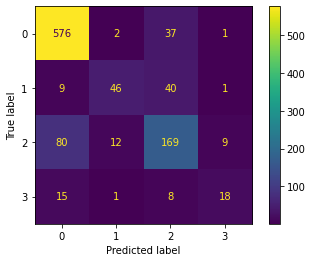

score:  0.7900390625


C:\Users\liule\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


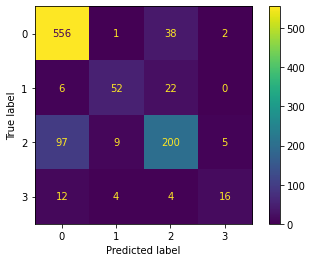

score:  0.8046875


C:\Users\liule\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


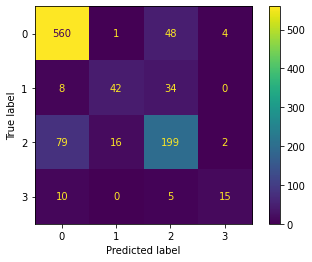

score:  0.7976539589442815


C:\Users\liule\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


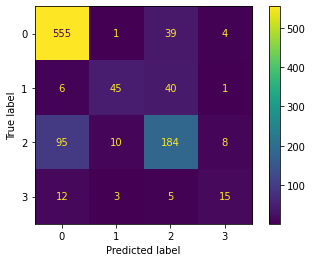

score:  0.7810361681329422


C:\Users\liule\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


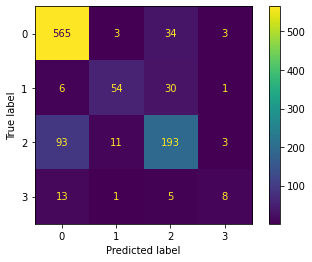

score:  0.8015640273704789


[0.7900390625,
 0.8046875,
 0.7976539589442815,
 0.7810361681329422,
 0.8015640273704789]

In [81]:
scores = []
kf = KFold(n_splits=5, shuffle=True)
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.02,max_depth=5, random_state=82)

for train_idx, test_idx in kf.split(x_select):
    x_train = x_select[train_idx]
    y_train = y_select[train_idx]
    x_test = x_select[test_idx]
    y_test = y_select[test_idx]
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    s = f1_score(y_test, y_pred, average='micro')
    plot_confusion_matrix(clf,x_test,y_test)
    plt.show()
    print('score: ', s)
    scores.append(s)

scores

In [82]:
print(np.mean(scores))

0.7949961433895405


In [451]:
from sklearn.preprocessing import StandardScaler

In [500]:
scaler = StandardScaler()
standard_x_train_features = scaler.fit_transform(x_select)
standard_x_test_features = scaler.fit_transform(x_test_select)

C:\Users\liule\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


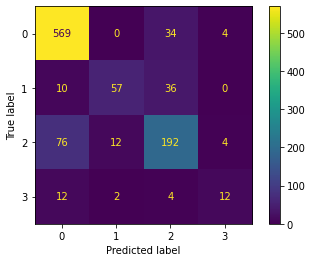

score:  0.810546875


C:\Users\liule\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


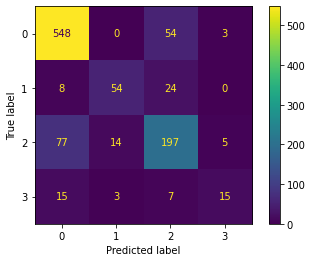

score:  0.794921875


C:\Users\liule\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


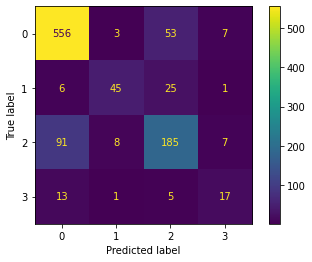

score:  0.7849462365591398


C:\Users\liule\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


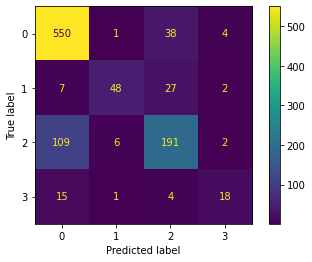

score:  0.7888563049853372


C:\Users\liule\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


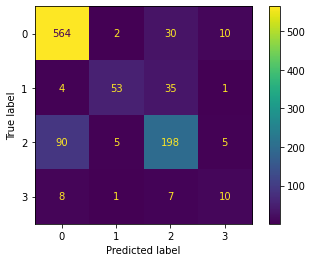

score:  0.8064516129032258


[0.810546875,
 0.794921875,
 0.7849462365591398,
 0.7888563049853372,
 0.8064516129032258]

In [454]:
scores = []
kf = KFold(n_splits=5, shuffle=True)
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.02,max_depth=5, random_state=82)

for train_idx, test_idx in kf.split(standard_x_train_features):
    x_train = standard_x_train_features[train_idx]
    y_train = y_select[train_idx]
    x_test = standard_x_train_features[test_idx]
    y_test = y_select[test_idx]
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    s = f1_score(y_test, y_pred, average='micro')
    plot_confusion_matrix(clf,x_test,y_test)
    plt.show()
    print('score: ', s)
    scores.append(s)

scores

In [501]:
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.02,max_depth=5, random_state=82)

In [503]:
clf.fit(standard_x_train_features,y_select)

C:\Users\liule\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier(learning_rate=0.02, max_depth=5, n_estimators=300,
                           random_state=82)

In [505]:
y_pred = clf.predict(standard_x_test_features)
y_pred.shape

(3411,)

In [506]:
pd.DataFrame(y_pred).to_csv('submission_try_standarize.csv')

In [455]:
print(np.mean(scores))

0.7971445808895407


## Try other boosting and subsampling

In [507]:
from imblearn.under_sampling import TomekLinks
from imblearn import ensemble

In [496]:
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.02,max_depth=5, random_state=82)

In [497]:
smt = RandomUnderSampler(random_state=66)
X_smt, y_smt = smt.fit_resample(standard_x_train_features, y_select)

In [498]:
clf.fit(X_smt, y_smt)

GradientBoostingClassifier(learning_rate=0.02, max_depth=5, n_estimators=300,
                           random_state=82)

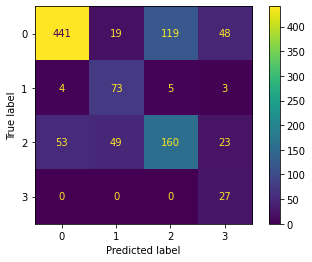

score:  0.6845703125


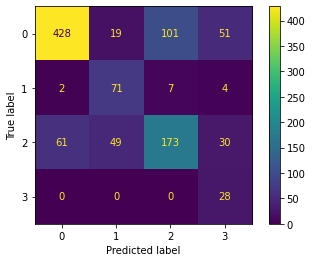

score:  0.68359375


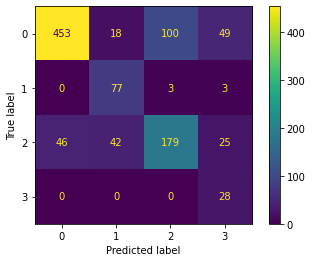

score:  0.7204301075268817


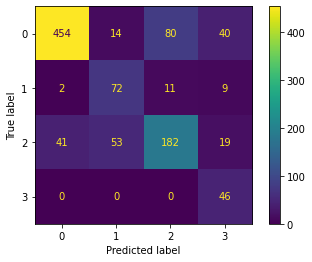

score:  0.7370478983382209


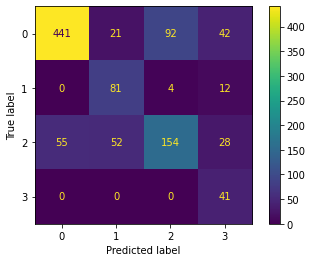

score:  0.7008797653958945


[0.6845703125,
 0.68359375,
 0.7204301075268817,
 0.7370478983382209,
 0.7008797653958945]

In [499]:
scores = []
for train_idx, test_idx in kf.split(standard_x_train_features):
    x_train = standard_x_train_features[train_idx]
    y_train = y_select[train_idx]
    x_test = standard_x_train_features[test_idx]
    y_test = y_select[test_idx]
    y_pred = clf.predict(x_test)
    s = f1_score(y_test, y_pred, average='micro')
    plot_confusion_matrix(clf,x_test,y_test)
    plt.show()
    print('score: ', s)
    scores.append(s)

scores

In [471]:
print(np.mean(scores))

0.9304282746823069


In [472]:
y_pred = clf.predict(standard_x_test_features)

In [473]:
pd.DataFrame(y_pred).to_csv('submission_try_subsampling.csv')

In [492]:
scores = []
wight_dict = {0:1,1:1.2,2:1.1,3:1.2}
kf = KFold(n_splits=5, shuffle=True)
clf = SVC(class_weight=wight_dict)

for train_idx, test_idx in kf.split(x_select):
    x_train = x_select[train_idx]
    y_train = y_select[train_idx]
    x_test = x_select[test_idx]
    y_test = y_select[test_idx]
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    s = f1_score(y_test, y_pred, average='micro')
    #plot_confusion_matrix(clf,x_test,y_test)
    plt.show()
    print('score: ', s)
    scores.append(s)

print(scores)
print(np.mean(scores))

C:\Users\liule\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


score:  0.634765625


C:\Users\liule\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


score:  0.6474609375


C:\Users\liule\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


score:  0.6510263929618768


C:\Users\liule\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


score:  0.6314760508308895


C:\Users\liule\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


score:  0.6539589442815249
[0.634765625, 0.6474609375, 0.6510263929618768, 0.6314760508308895, 0.6539589442815249]
0.6437375901148582
